In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv("cleaned_dataset1.csv")
except FileNotFoundError:
    print("File not found.")
    exit()

print("Overall Description of Capital Gain and Loss:")
print(df[['Capital_Gain', 'Capital_Loss']].describe())

Overall Description of Capital Gain and Loss:
       Capital_Gain  Capital_Loss
count  48842.000000  48842.000000
mean    1079.067626     87.502314
std     7452.019058    403.004552
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max    99999.000000   4356.000000


In [3]:
print("Description of Non-Zero Capital Gain:")
print(df[df['Capital_Gain'] > 0]['Capital_Gain'].describe())

Description of Non-Zero Capital Gain:
count     4035.000000
mean     13061.665675
std      22711.237412
min        114.000000
25%       3411.000000
50%       7298.000000
75%      13550.000000
max      99999.000000
Name: Capital_Gain, dtype: float64


In [4]:
print("Description of Non-Zero Capital Loss:")
print(df[df['Capital_Loss'] > 0]['Capital_Loss'].describe())

Description of Non-Zero Capital Loss:
count    2282.000000
mean     1872.825592
std       364.048529
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: Capital_Loss, dtype: float64


In [5]:
df['Has_Capital_Activity'] = (df['Capital_Gain'] > 0) | (df['Capital_Loss'] > 0)
proportion_with_activity = df['Has_Capital_Activity'].mean()
print(f"Proportion of individuals with any capital activity: {proportion_with_activity:.2%}")

Proportion of individuals with any capital activity: 12.93%


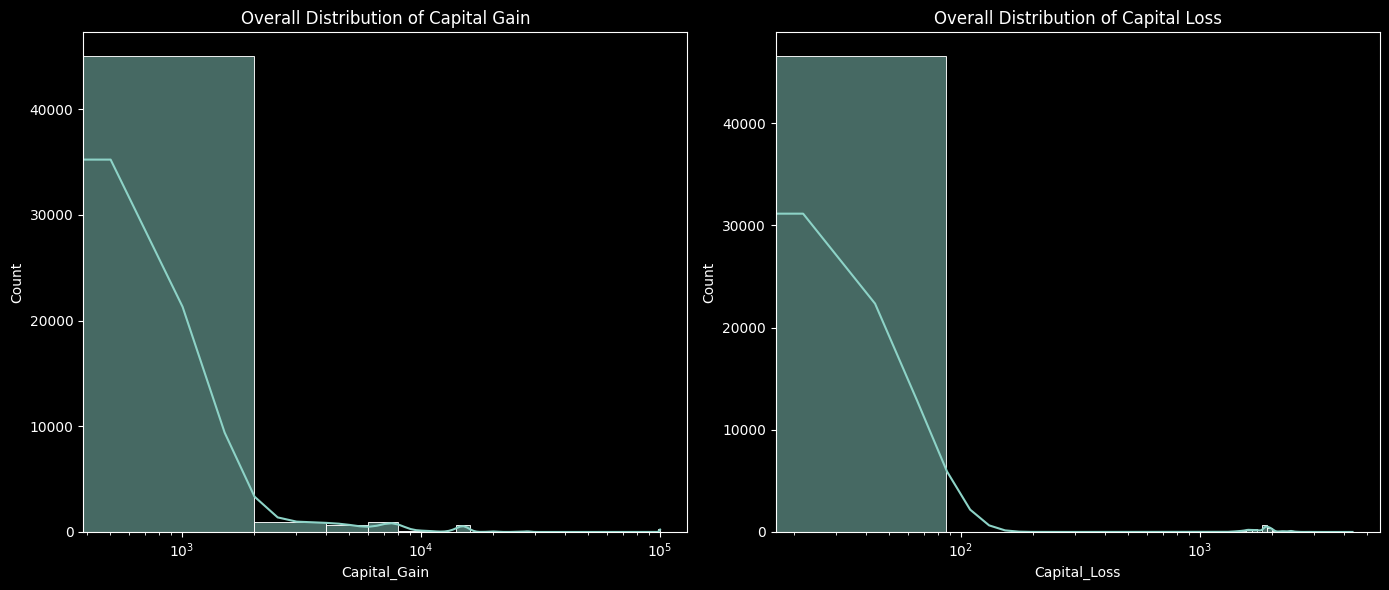

In [6]:
plt.figure(figsize=(14, 6))
# Overall distribution of Capital Gain
plt.subplot(1, 2, 1)
sns.histplot(df['Capital_Gain'], bins=50, kde=True)
plt.title('Overall Distribution of Capital Gain')
plt.xscale('log')  # Use a log scale due to skewness

# Overall distribution of Capital Loss
plt.subplot(1, 2, 2)
sns.histplot(df['Capital_Loss'], bins=50, kde=True)
plt.title('Overall Distribution of Capital Loss')
plt.xscale('log')  # Use a log scale due to skewness

plt.tight_layout()
plt.show()

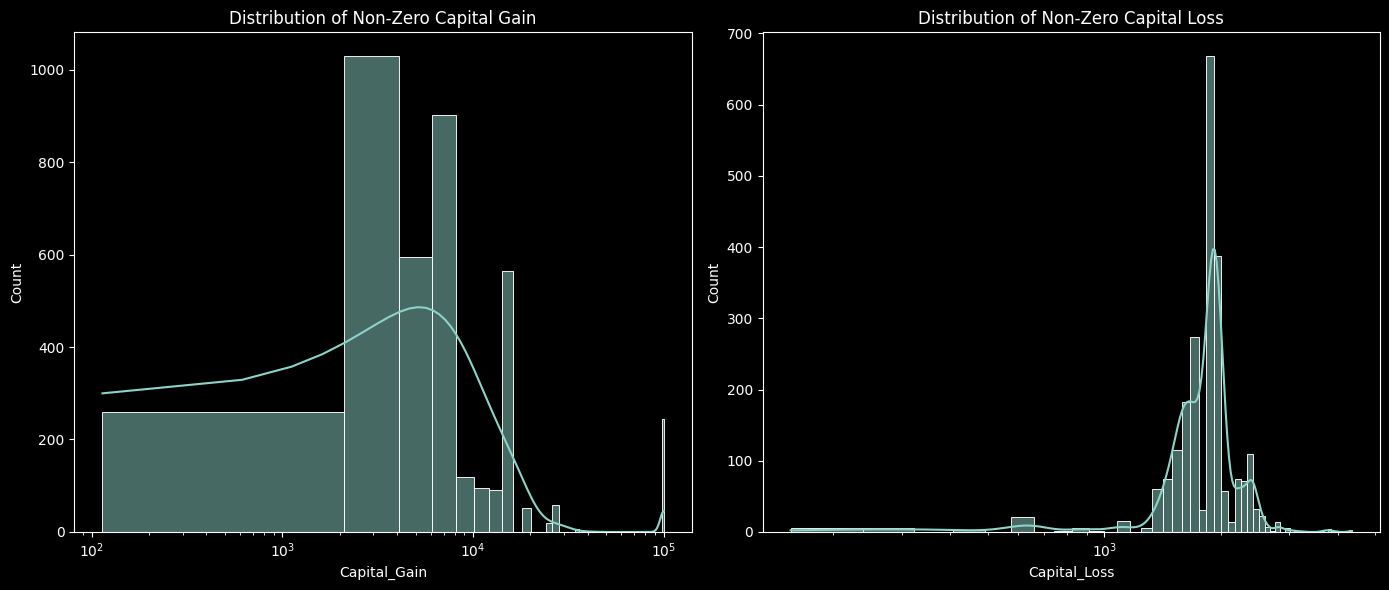

In [7]:
plt.figure(figsize=(14, 6))

# Non-zero distribution of Capital Gain
plt.subplot(1, 2, 1)
sns.histplot(df[df['Capital_Gain'] > 0]['Capital_Gain'], bins=50, kde=True)
plt.title('Distribution of Non-Zero Capital Gain')
plt.xscale('log')

# Non-zero distribution of Capital Loss
plt.subplot(1, 2, 2)
sns.histplot(df[df['Capital_Loss'] > 0]['Capital_Loss'], bins=50, kde=True)
plt.title('Distribution of Non-Zero Capital Loss')
plt.xscale('log')

plt.tight_layout()
plt.show()

# Grouping by Age & Work Intensity

In [8]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Age Grouping
age_bins = [16, 30, 45, 60, 100]
age_labels = ['Young Adult (17-30)', 'Middle-Aged (31-45)', 'Senior Adult (46-60)', 'Elderly (61+)']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# Work Intensity Grouping
work_bins = [0, 39, 40, 50, 100]
work_labels = ['Part-Time (<40)', 'Full-Time (40)', 'Overtime (41-50)', 'High-Intensity (>50)']
df['Work_Intensity'] = pd.cut(df['Hours_per_week'], bins=work_bins, labels=work_labels, right=True)

# Calculate Net Capital
df['Net_Capital'] = df['Capital_Gain'] - df['Capital_Loss']

# Group by Age
age_group_analysis = df.groupby('Age_Group', observed=True).agg(
    Average_Net_Capital=('Net_Capital', 'mean'),
    Proportion_with_Capital_Activity=('Has_Capital_Activity', 'mean')
).reset_index()

print("Analysis by Age Group:")
print(age_group_analysis)

# Group by Work Intensity
work_intensity_analysis = df.groupby('Work_Intensity', observed=True).agg(
    Average_Net_Capital=('Net_Capital', 'mean'),
    Proportion_with_Capital_Activity=('Has_Capital_Activity', 'mean')
).reset_index()

print("\nAnalysis by Work Intensity:")
print(work_intensity_analysis)

Analysis by Age Group:
              Age_Group  Average_Net_Capital  Proportion_with_Capital_Activity
0   Young Adult (17-30)           245.034762                          0.068195
1   Middle-Aged (31-45)          1065.982167                          0.145582
2  Senior Adult (46-60)          1743.274090                          0.167855
3         Elderly (61+)          1599.075707                          0.196894

Analysis by Work Intensity:
         Work_Intensity  Average_Net_Capital  Proportion_with_Capital_Activity
0       Part-Time (<40)           463.452640                          0.087790
1        Full-Time (40)           668.774065                          0.116344
2      Overtime (41-50)          1540.409218                          0.179096
3  High-Intensity (>50)          2581.007912                          0.191536


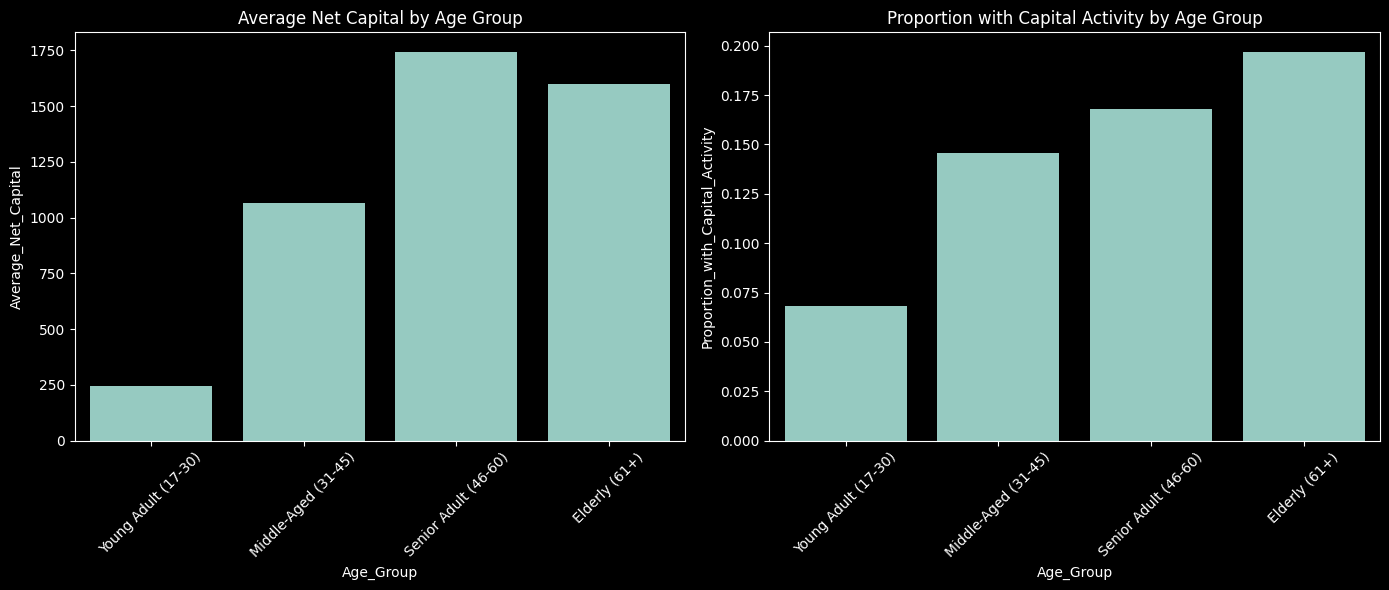

In [9]:
plt.figure(figsize=(14, 6))

# Average Net Capital by Age Group
plt.subplot(1, 2, 1)
sns.barplot(data=age_group_analysis, x='Age_Group', y='Average_Net_Capital')
plt.title('Average Net Capital by Age Group')
plt.xticks(rotation=45)

# Proportion with Capital Activity by Age Group
plt.subplot(1, 2, 2)
sns.barplot(data=age_group_analysis, x='Age_Group',
            y='Proportion_with_Capital_Activity')
plt.title('Proportion with Capital Activity by Age Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

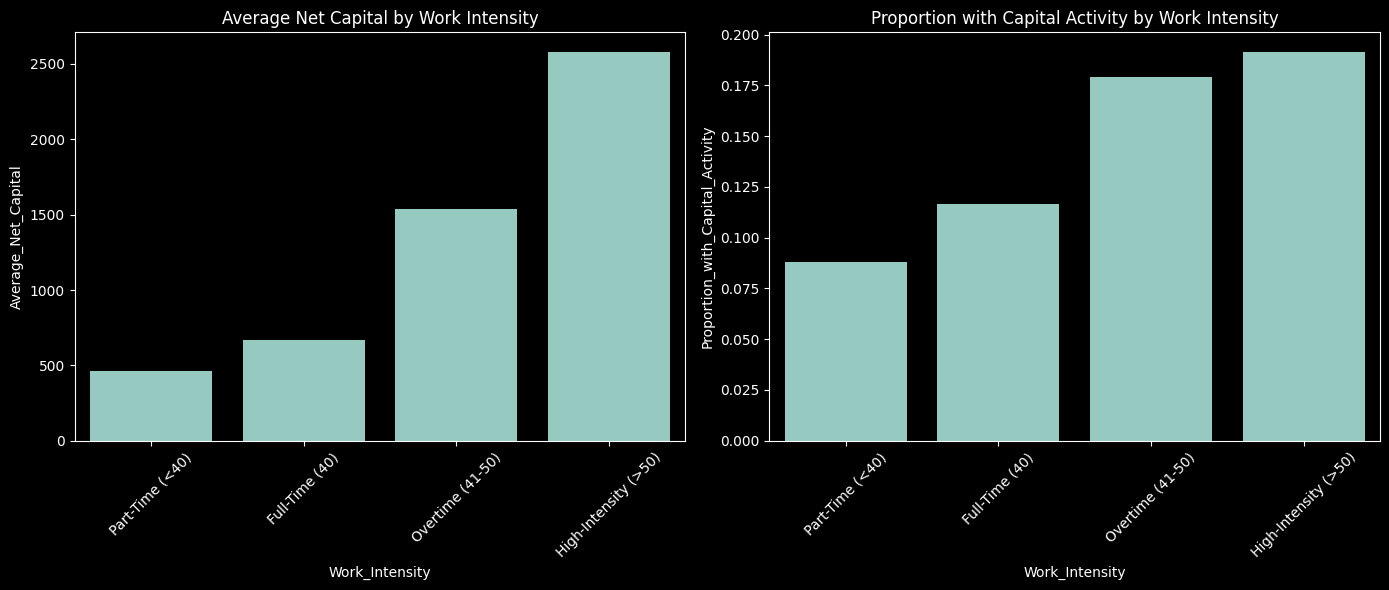

In [10]:
plt.figure(figsize=(14, 6))

# Average Net Capital by Work Intensity
plt.subplot(1, 2, 1)
sns.barplot(data=work_intensity_analysis,
            x='Work_Intensity', y='Average_Net_Capital')
plt.title('Average Net Capital by Work Intensity')
plt.xticks(rotation=45)

# Proportion with Capital Activity by Work Intensity
plt.subplot(1, 2, 2)
sns.barplot(data=work_intensity_analysis,
            x='Work_Intensity', y='Proportion_with_Capital_Activity')
plt.title('Proportion with Capital Activity by Work Intensity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

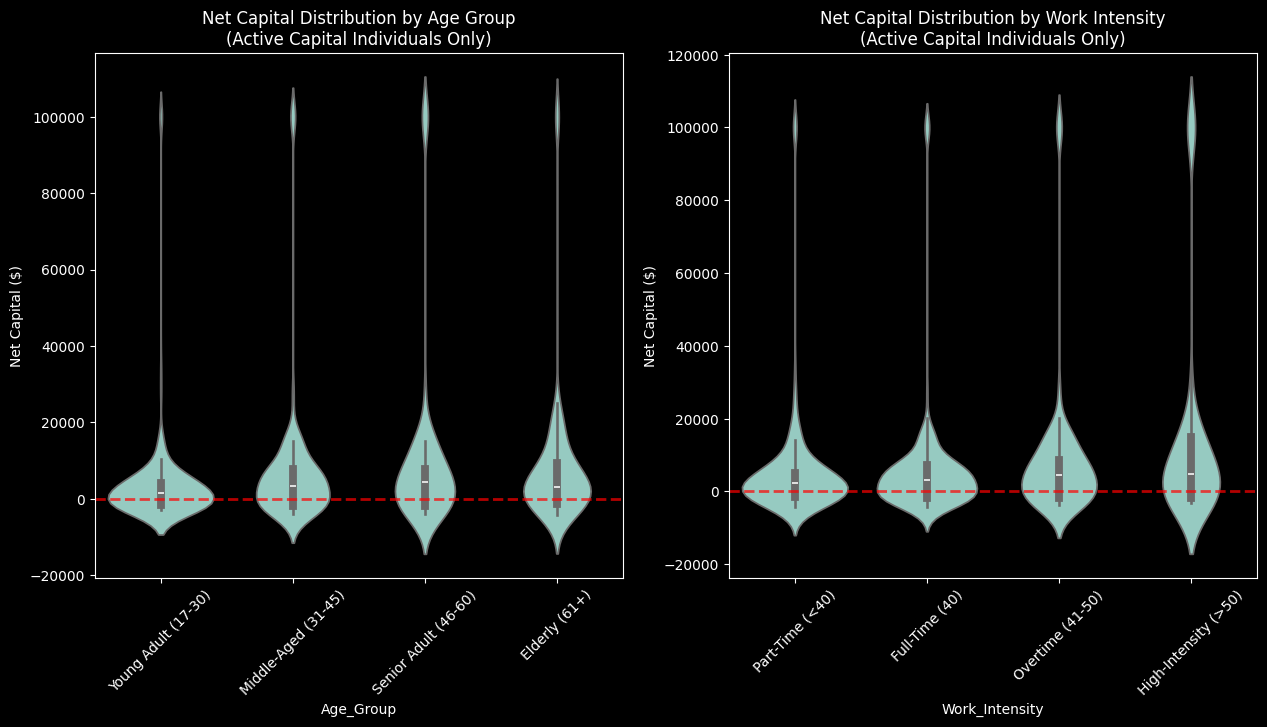

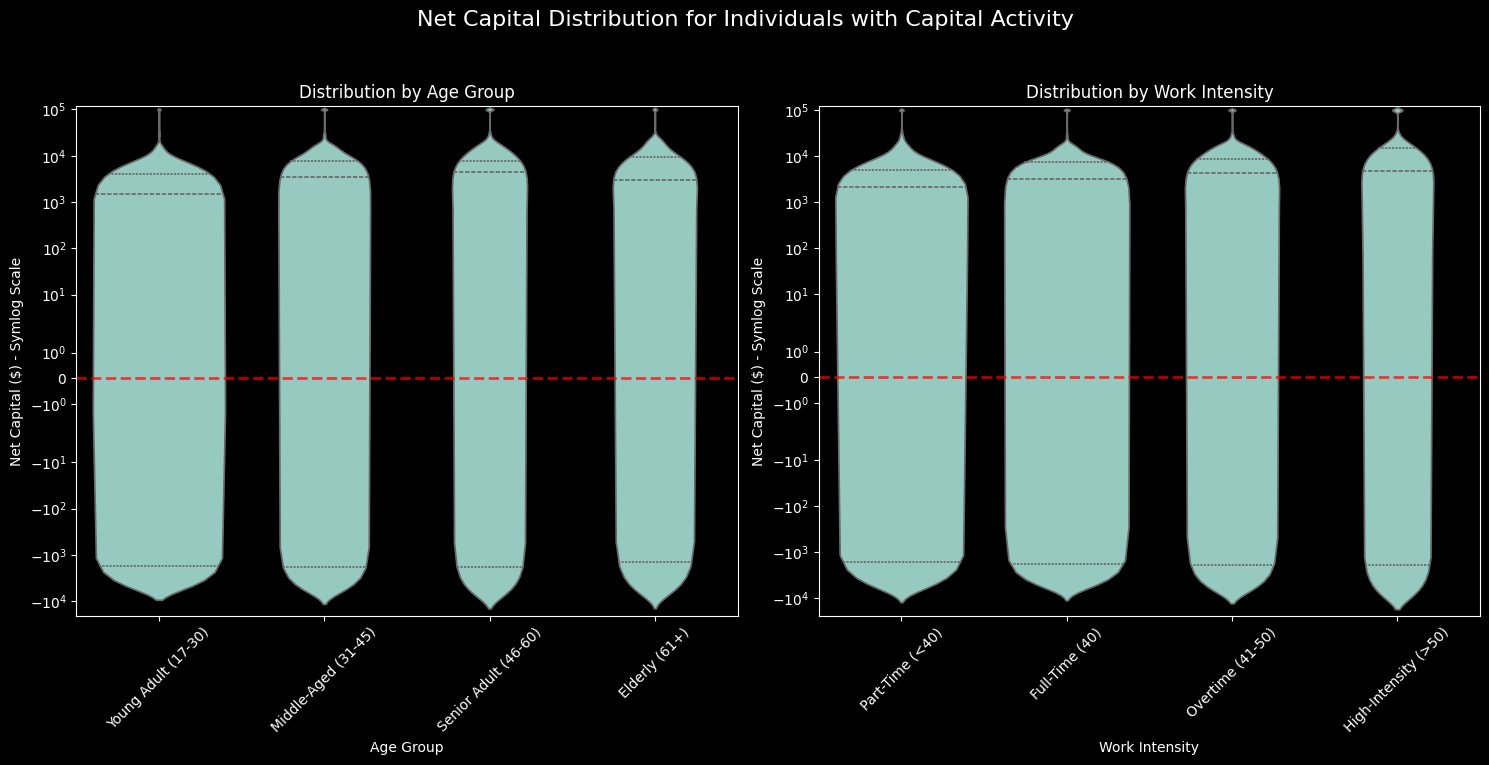

In [11]:
# Violin Plots of Net Capital by Group (filtering out zero-capital individuals)
plt.figure(figsize=(15, 15))

# Filter data for individuals with capital activity
active_capital_df = df[df['Has_Capital_Activity'] == True]

# Violin plot of Net Capital by Age Group
plt.subplot(2, 2, 1)
sns.violinplot(data=active_capital_df, x='Age_Group', y='Net_Capital')
plt.axhline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
plt.title('Net Capital Distribution by Age Group\n(Active Capital Individuals Only)')
plt.xticks(rotation=45)
plt.ylabel('Net Capital ($)')

# Violin plot of Net Capital by Work Intensity
plt.subplot(2, 2, 2)
sns.violinplot(data=active_capital_df, x='Work_Intensity', y='Net_Capital')
plt.axhline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
plt.title('Net Capital Distribution by Work Intensity\n(Active Capital Individuals Only)')
plt.xticks(rotation=45)
plt.ylabel('Net Capital ($)')

# Create a larger figure with a 1x2 layout
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Net Capital Distribution for Individuals with Capital Activity', fontsize=16)

# Filter data for individuals with capital activity
active_capital_df = df[df['Has_Capital_Activity'] == True]

# Violin plot for Age Group
sns.violinplot(ax=axes[0], data=active_capital_df, x='Age_Group', y='Net_Capital', inner='quartile')
axes[0].set_title('Distribution by Age Group')
axes[0].set_ylabel('Net Capital ($) - Symlog Scale')
axes[0].set_xlabel('Age Group')
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
axes[0].set_yscale('symlog') # Use a symmetric log scale

# Violin plot for Work Intensity
sns.violinplot(ax=axes[1], data=active_capital_df, x='Work_Intensity', y='Net_Capital', inner='quartile')
axes[1].set_title('Distribution by Work Intensity')
axes[1].set_ylabel('Net Capital ($) - Symlog Scale')
axes[1].set_xlabel('Work Intensity')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
axes[1].set_yscale('symlog') # Use a symmetric log scale

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

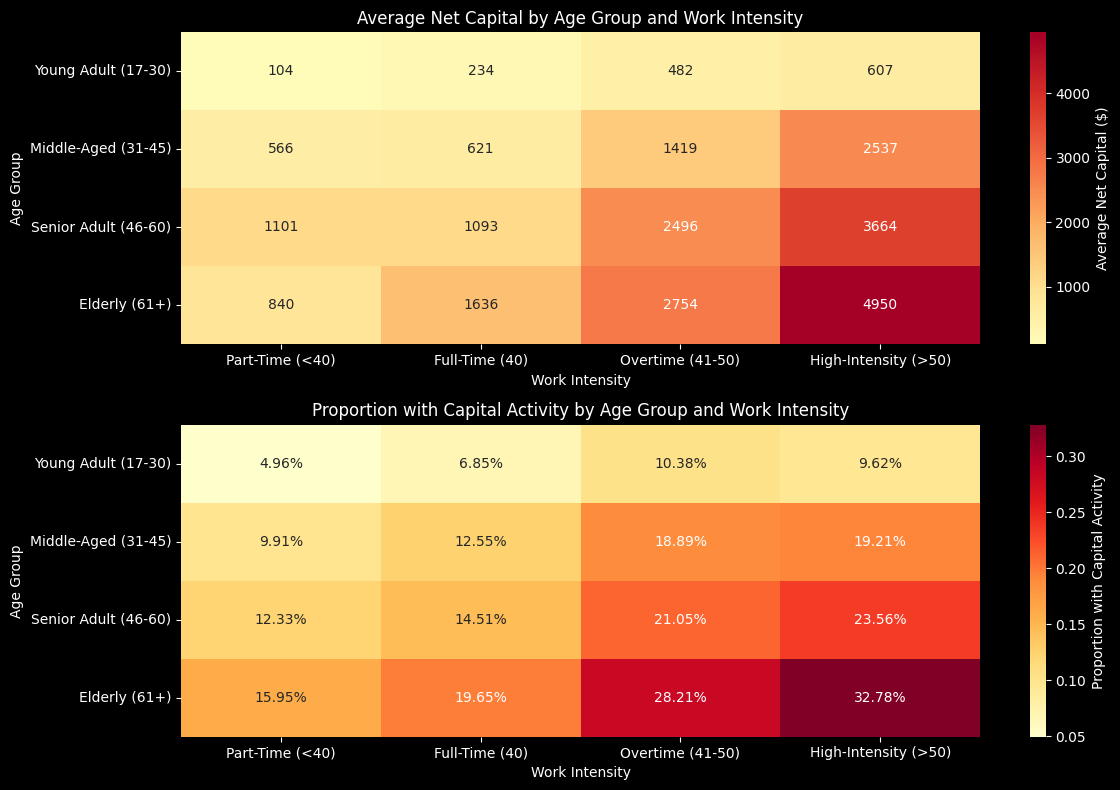

In [12]:
# Heatmap for Interaction Effects (Age Group x Work Intensity)
plt.figure(figsize=(12, 8))

# Create pivot table for average net capital by age group and work intensity
pivot_table = df.groupby(['Age_Group', 'Work_Intensity'], observed=True)[
    'Net_Capital'].mean().unstack()

# Heatmap of average net capital
plt.subplot(2, 1, 1)
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='RdYlBu_r',
            center=0, cbar_kws={'label': 'Average Net Capital ($)'})
plt.title('Average Net Capital by Age Group and Work Intensity')
plt.ylabel('Age Group')
plt.xlabel('Work Intensity')

# Create pivot table for proportion with capital activity
pivot_activity = df.groupby(['Age_Group', 'Work_Intensity'], observed=True)[
    'Has_Capital_Activity'].mean().unstack()

# Heatmap of proportion with capital activity
plt.subplot(2, 1, 2)
sns.heatmap(pivot_activity, annot=True, fmt='.2%', cmap='YlOrRd',
            cbar_kws={'label': 'Proportion with Capital Activity'})
plt.title('Proportion with Capital Activity by Age Group and Work Intensity')
plt.ylabel('Age Group')
plt.xlabel('Work Intensity')

plt.tight_layout()
plt.show()

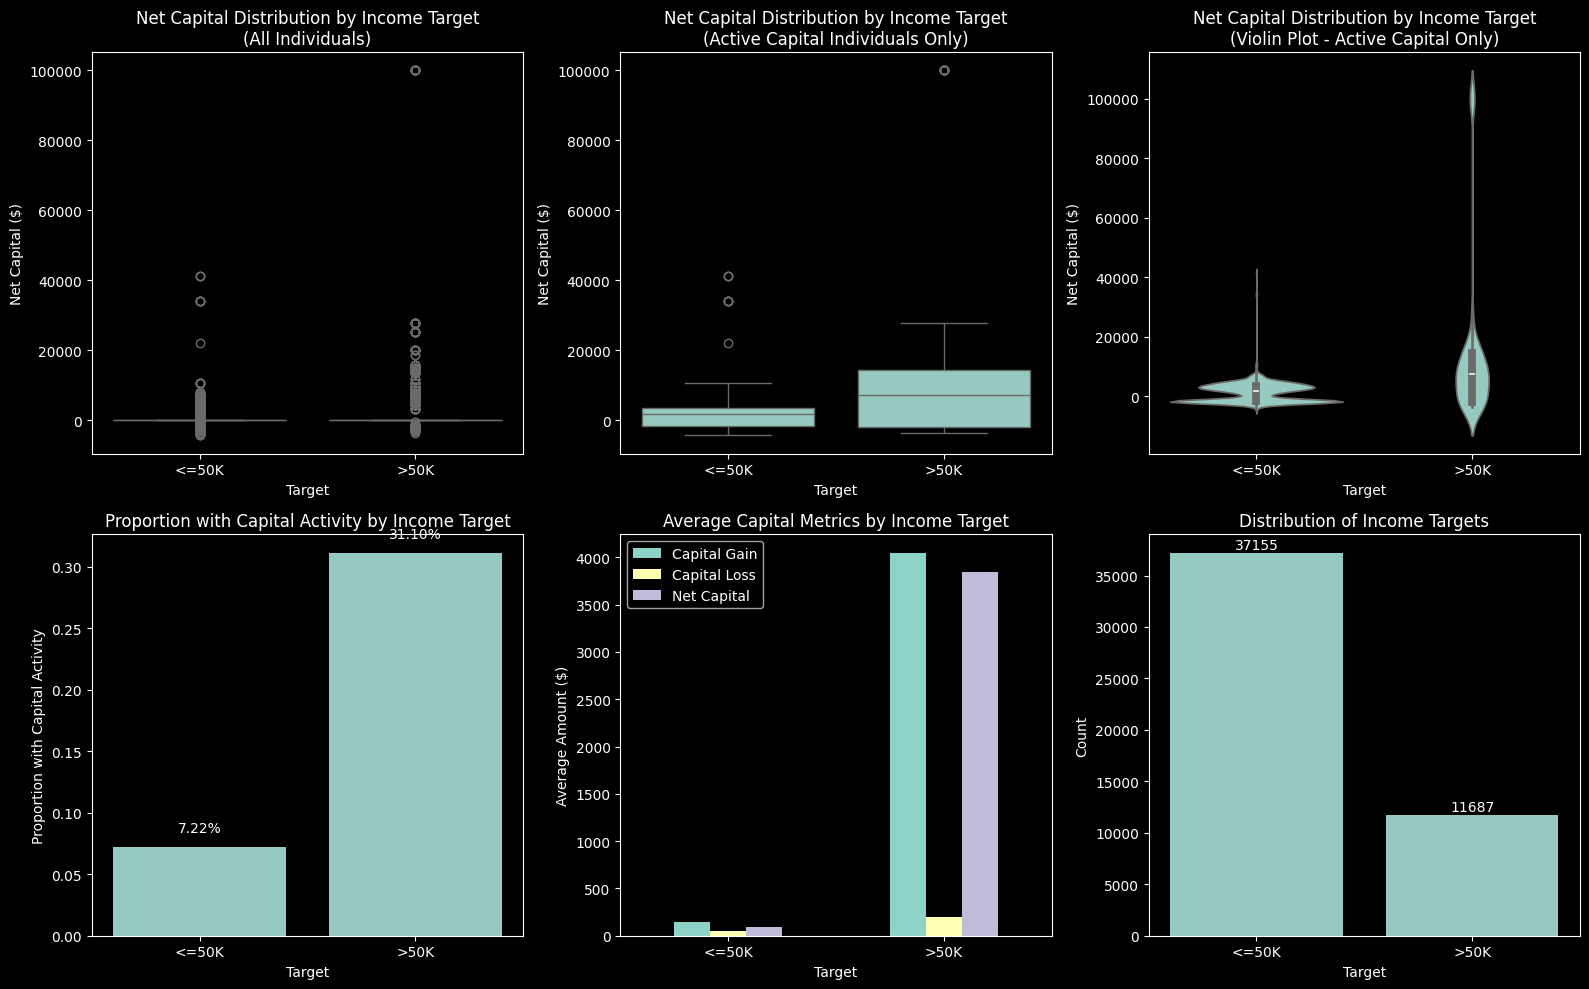

Capital Activity Summary by Income Target:
  Target  Proportion_Active  Count
0  <=50K           0.072184  37155
1   >50K           0.311029  11687

Capital Metrics by Income Target:
        Capital_Gain  Capital_Loss  Net_Capital
Target                                         
<=50K     147.010308     54.151931    92.858377
>50K     4042.239497    193.528964  3848.710533


In [13]:
# Net Capital's Relationship with Income Target
plt.figure(figsize=(16, 10))

# Box plot of Net Capital by Income Target
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='Target', y='Net_Capital')
plt.title('Net Capital Distribution by Income Target\n(All Individuals)')
plt.ylabel('Net Capital ($)')

# Box plot for active capital individuals only
plt.subplot(2, 3, 2)
sns.boxplot(data=active_capital_df, x='Target', y='Net_Capital')
plt.title(
    'Net Capital Distribution by Income Target\n(Active Capital Individuals Only)')
plt.ylabel('Net Capital ($)')

# Violin plot for better distribution visualization
plt.subplot(2, 3, 3)
sns.violinplot(data=active_capital_df, x='Target', y='Net_Capital')
plt.title(
    'Net Capital Distribution by Income Target\n(Violin Plot - Active Capital Only)')
plt.ylabel('Net Capital ($)')

# Capital activity proportion by income target
plt.subplot(2, 3, 4)
capital_by_income = df.groupby('Target')['Has_Capital_Activity'].agg([
    'mean', 'count']).reset_index()
capital_by_income.columns = ['Target', 'Proportion_Active', 'Count']
sns.barplot(data=capital_by_income, x='Target', y='Proportion_Active')
plt.title('Proportion with Capital Activity by Income Target')
plt.ylabel('Proportion with Capital Activity')
for i, v in enumerate(capital_by_income['Proportion_Active']):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom')

# Average capital gain and loss by income target
plt.subplot(2, 3, 5)
income_capital_stats = df.groupby(
    'Target')[['Capital_Gain', 'Capital_Loss', 'Net_Capital']].mean()
income_capital_stats.plot(kind='bar', ax=plt.gca())
plt.title('Average Capital Metrics by Income Target')
plt.ylabel('Average Amount ($)')
plt.xticks(rotation=0)
plt.legend(['Capital Gain', 'Capital Loss', 'Net Capital'])

# Count plot showing distribution of income targets
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='Target')
plt.title('Distribution of Income Targets')
plt.ylabel('Count')
for i, v in enumerate(df['Target'].value_counts().sort_index()):
    plt.text(i, v + 100, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Capital Activity Summary by Income Target:")
print(capital_by_income)
print("\nCapital Metrics by Income Target:")
print(income_capital_stats)

In [14]:
# Additional Insights: Statistical Analysis
from scipy import stats

print("=== STATISTICAL INSIGHTS ===\n")

# 1. Test if there's a significant difference in net capital between income groups
high_income_capital = df[df['Target'] == '>50K']['Net_Capital']
low_income_capital = df[df['Target'] == '<=50K']['Net_Capital']

# Mann-Whitney U test (non-parametric, better for skewed data)
statistic, p_value = stats.mannwhitneyu(
    high_income_capital, low_income_capital, alternative='two-sided')
print(f"Mann-Whitney U test for Net Capital difference between income groups:")
print(f"Statistic: {statistic:.2f}, P-value: {p_value:.2e}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}\n")

# 2. Correlation between age and net capital
age_capital_corr = df['Age'].corr(df['Net_Capital'])
print(f"Correlation between Age and Net Capital: {age_capital_corr:.3f}\n")

# 3. Correlation between hours worked and net capital
hours_capital_corr = df['Hours_per_week'].corr(df['Net_Capital'])
print(
    f"Correlation between Hours per Week and Net Capital: {hours_capital_corr:.3f}\n")

# 4. Summary of extreme values
print("Individuals with highest net capital:")
top_capital = df.nlargest(5, 'Net_Capital')[
    ['Age', 'Hours_per_week', 'Net_Capital', 'Target', 'Age_Group', 'Work_Intensity']]
print(top_capital)

print("\nIndividuals with lowest net capital (highest losses):")
bottom_capital = df.nsmallest(5, 'Net_Capital')[
    ['Age', 'Hours_per_week', 'Net_Capital', 'Target', 'Age_Group', 'Work_Intensity']]
print(bottom_capital)

=== STATISTICAL INSIGHTS ===

Mann-Whitney U test for Net Capital difference between income groups:
Statistic: 240685227.00, P-value: 4.57e-203
Significant difference: Yes

Correlation between Age and Net Capital: 0.074

Correlation between Hours per Week and Net Capital: 0.079

Individuals with highest net capital:
      Age  Hours_per_week  Net_Capital Target             Age_Group  \
1246   54              60        99999   >50K  Senior Adult (46-60)   
1368   52              40        99999   >50K  Senior Adult (46-60)   
1482   53              40        99999   >50K  Senior Adult (46-60)   
1528   52              50        99999   >50K  Senior Adult (46-60)   
1616   46              60        99999   >50K  Senior Adult (46-60)   

            Work_Intensity  
1246  High-Intensity (>50)  
1368        Full-Time (40)  
1482        Full-Time (40)  
1528      Overtime (41-50)  
1616  High-Intensity (>50)  

Individuals with lowest net capital (highest losses):
       Age  Hours_per_week